## Stores

In [1]:
import pandas as pd
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import utils
import plotly.express as px

## Stores

In [2]:
stores = pd.read_csv("data/stores-data-set.csv")
stores.head()

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

In [3]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [4]:
stores.describe(include="all")

Store Type           Size
count   45.000000   45      45.000000
unique        NaN    3            NaN
top           NaN    A            NaN
freq          NaN   22            NaN
mean    23.000000  NaN  130287.600000
std     13.133926  NaN   63825.271991
min      1.000000  NaN   34875.000000
25%     12.000000  NaN   70713.000000
50%     23.000000  NaN  126512.000000
75%     34.000000  NaN  202307.000000
max     45.000000  NaN  219622.000000

In [5]:
utils.check_duplicates(stores)

0

In [6]:
print("Stores = ", sorted(stores["Store"].unique()))

Stores =  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]


There are total of 45 stores with varying size.  

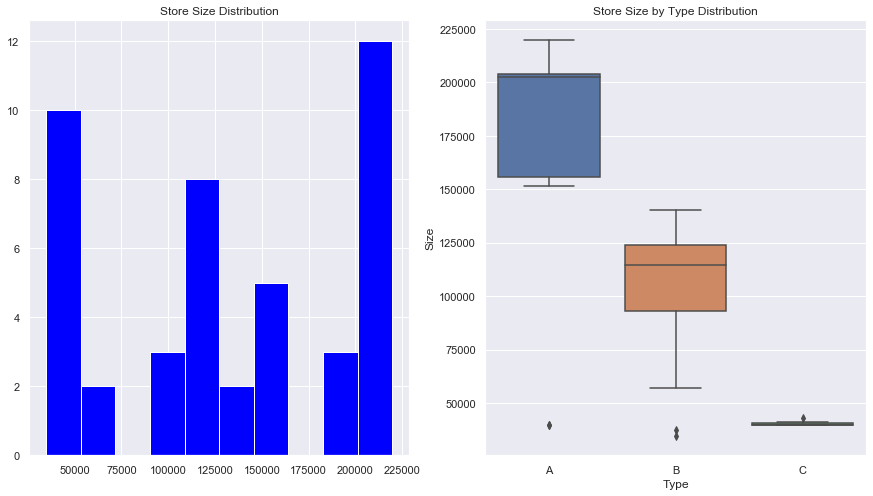

In [7]:
fig, axes = plt.subplots(1,2, figsize=(15,8))
axes[0].hist(stores["Size"], color = "blue", bins=10)
sns.boxplot(x="Type", y="Size", data=stores, ax=axes[1]);
axes[0].set_title("Store Size Distribution")
axes[1].set_title("Store Size by Type Distribution");

In [8]:
stores["Type"].value_counts()

A    22
B    17
C     6
Name: Type, dtype: int64

Above historgram plot shows that there are 3 groups of store size, but store type doesn't seem to be an indicator for the size.  There are only 6 C type stores, but the histogram plot shows that each group has more than 6 stores.

## K-means clustering based on the store size

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [10]:
store_size = np.array(stores["Size"])
store_size = store_size.reshape(-1, 1)
stores_std = StandardScaler().fit_transform(store_size)

km = KMeans(n_clusters=3, max_iter=100, random_state=13)
km.fit(stores_std)
centroids = km.cluster_centers_
print("Centroids = ", centroids)
print("Labels = ", km.labels_)

Centroids =  [[ 1.15501643]
 [-0.04666193]
 [-1.37377764]]
Labels =  [1 0 2 0 2 0 2 1 1 1 0 1 0 0 1 2 1 1 0 0 1 1 1 0 1 1 0 0 1 2 0 0 2 1 1 2 2
 2 0 1 0 2 2 2 1]


In [11]:
stores_n = np.arange(1, 46)
stores_n[km.labels_ == 0]
cluster_one = stores_std[km.labels_ == 0]
cluster_two = stores_std[km.labels_ == 1]
cluster_three = stores_std[km.labels_ == 2]

In [12]:
stores[km.labels_ == 2]["Type"]

2     B
4     B
6     B
15    B
29    C
32    A
35    A
36    C
37    C
41    C
42    C
43    C
Name: Type, dtype: object

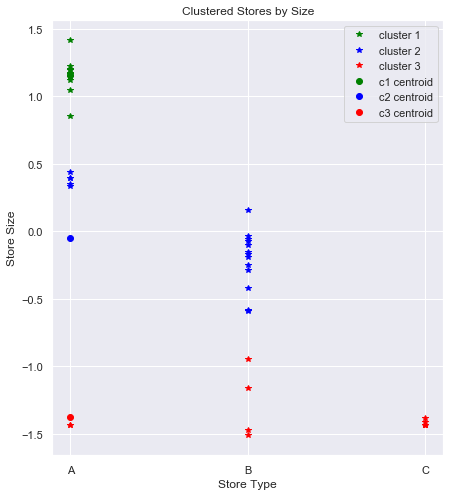

In [13]:
fig, ax = plt.subplots(figsize=(7, 8))
plt.plot(stores[km.labels_ == 0]["Type"], cluster_one, c = "green", label = "cluster 1", linestyle="",marker="*")
plt.plot(stores[km.labels_ == 1]["Type"],cluster_two, c = "blue", label = "cluster 2", linestyle="",marker="*")
plt.plot(stores[km.labels_ == 2]["Type"], cluster_three, c = "red", label = "cluster 3", linestyle="",marker="*")
plt.plot(centroids[0], c = "green", label = "c1 centroid", linestyle="",marker="o")
plt.plot(centroids[1], c = "blue", label = "c2 centroid", linestyle="",marker="o")
plt.plot(centroids[2], c = "red", label = "c3 centroid", linestyle="",marker="o")
plt.xlabel("Store Type")
plt.ylabel("Store Size")
plt.title("Clustered Stores by Size")
plt.legend();

Above graph shows that store type is not related to store size. There are 3 groups for store sizes. Type A group includes all store sizes, Type B includes small and mid size stores, and Type C includes small stores only.